# Test mail sending in Colab

Just to test mail sending

Google gmail/SMTP instructions: [Send email from a printer, scanner, or app](https://support.google.com/a/answer/176600?hl=en&sjid=7380508919146209669-EU)

Python [email module examples](https://docs.python.org/3/library/email.examples.html)

# How to Use Instructions with Gmail

_Note: this should work with any SMTP server. This example just illustrates how to use with Gmail_

Create an applications password in your Gmail account and add the account details to Colab secrets:

1. Goto Account Security settings tab

    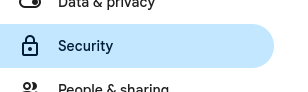

2. Select two step verification

    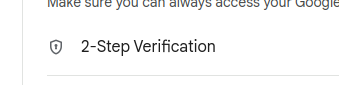

3. Select App Passwords

    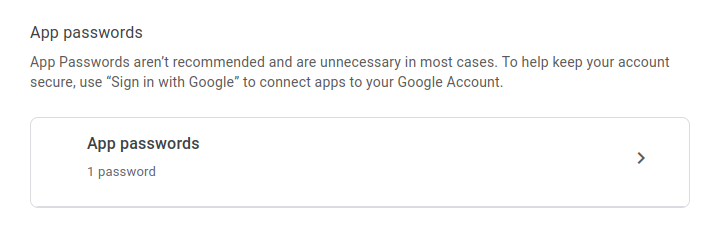

4. In App passwords page add a new name for and press enter. Copy the created password

    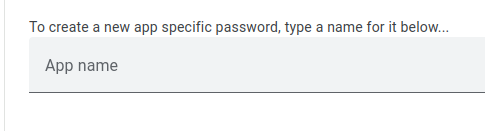

5. Go to your Colab secrets page. Add secret named "maill_password" and copy the generated password for the value. Create a secret name "mail_user" and add your Google account there _(mails will be sent by this user)_ and add "mail_receivers" secret which is a comma separated list of mail addresses. Remember to set all these secrets as "Notebook access"

    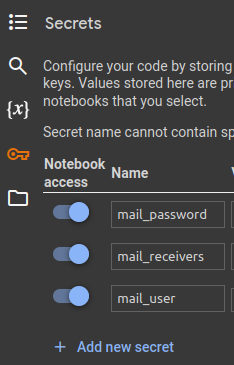

You are ready to run the mail example    

In [16]:
import smtplib
from email.message import EmailMessage
from google.colab import userdata

MAIL_SERVER = "smtp.gmail.com"
MAIL_PORT = 587

def mailer(subject, message, attachments = None):
    """Send mail message to recipeints

    :param subject: Subject of the mail message
    :param message: Message to be sent
    :param attachments: list of attachments for the mail
    """

    def addrs(addr_list):
        """return string suitable for payload"""
        return ", ".join(addr_list)

    msg = EmailMessage()
    msg["Subject"] = subject
    msg["From"] = userdata.get("mail_user")
    msg["To"] = userdata.get("mail_receivers")
    msg.set_content(message)
    if attachments:
        for attachment in attachments:
            msg.add_attachment(attachment)

    try:
        print(f"sending: {MAIL_SERVER}:{MAIL_PORT} ..")
        mailer = smtplib.SMTP(MAIL_SERVER, MAIL_PORT)
        mailer.ehlo()
        mailer.starttls()
        mailer.login(userdata.get("mail_user"), userdata.get("mail_password"))
        mailer.send_message(msg)
        print(f".. sent")
    except smtplib.SMTPException:
        print(f".. send failed")
    finally:
        mailer.close()



subject = "testing colab mail sending"
mail_body = """Hi

There ..

Br, Oskar"""
attachments = None
mailer(subject, mail_body, attachments)

sending: smtp.gmail.com:587 ..
.. sent
